<a href="https://colab.research.google.com/github/SHRIYANSHGAUR/BrainTumorClassifier/blob/main/news_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install newspaper3k
!pip install GoogleNews
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 82.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13541 sha256=a679ef7c0e96c5136ea3844dba55b397b17d4a4d7efa0309233502391641acf2
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3339 sha256=f4b0cb5fe5e9f4ab8ac6440885fdf0bd115b1d425fa6850603668ac9d7a14f99
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1b

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from GoogleNews import GoogleNews
from newspaper import Article
from newspaper import Config
from wordcloud import WordCloud, STOPWORDS

nltk.download('vader_lexicon') #required for Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [13]:
now = dt.date.today()
now = now.strftime('%m-%d-%Y')
yesterday = dt.date.today() - dt.timedelta(days = 2)
yesterday = yesterday.strftime('%m-%d-%Y')

nltk.download('punkt')
user_agent = 'Version 1.58.131 Chromium: 117.0.5938.92'
config = Config()
config.browser_user_agent = user_agent
config.request_timeout = 10


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
# save the company name in a variable
company_name = input("Please provide the name of the Company or a Ticker: ")
#As long as the company name is valid not empty...
if company_name != '':
    print(f'Searching for and analyzing {company_name}, Please be patient, it might take a while...')

    #Extract News with Google News
    googlenews = GoogleNews(start=yesterday,end=now)
    googlenews.search(company_name)
    result = googlenews.result()
    #store the results
    df = pd.DataFrame(result)
    print(df)


Please provide the name of the Company or a Ticker: IRFC
Searching for and analyzing IRFC, Please be patient, it might take a while...
                                               title  \
0  Indian Railway Finance Corporation share price...   
1  IRFC, RVNL, ITDC, and Mazagon Dock: 4 PSU stoc...   
2  Rail Vikas Nigam, IRFC crack 20% from 52-week ...   
3  IRFC disburses ₹32,393 cr to Indian Railways i...   
4  IRFC holds its 36th Annual General Meeting, ne...   
5  आईआरएफसी को वित्त वर्ष 2022-23 में 6,337 करोड़...   
6  IRFC posts Rs 6,337 crore profit in FY23, tota...   
7  India News | Railway PSU IRFC Posts Rs 6,337.0...   
8  IRFC holds its 36th Annual General Meeting; ne...   
9  Indian Railway Finance Corporation share price...   

                                               media         date  \
0                                          Mintgenie  6 hours ago   
1                            The Hindu Business Line   2 days ago   
2                                 The Eco

In [18]:
try:
    list =[] #creating an empty list
    for i in df.index:
        dict = {} #creating an empty dictionary to append an article in every single iteration
        article = Article(df['link'][i],config=config) #providing the link
        try:
          article.download() #downloading the article
          article.parse() #parsing the article
          article.nlp() #performing natural language processing (nlp)
        except:
           pass
        #storing results in our empty dictionary
        dict['Date']=df['date'][i]
        dict['Media']=df['media'][i]
        dict['Title']=article.title
        dict['Article']=article.text
        dict['Summary']=article.summary
        dict['Key_words']=article.keywords
        list.append(dict)
    check_empty = not any(list)
    # print(check_empty)
    if check_empty == False:
      news_df=pd.DataFrame(list) #creating dataframe
      print(news_df)

except Exception as e:
    #exception handling
    print("exception occurred:" + str(e))
    print('Looks like, there is some error in retrieving the data, Please try again or try with a different ticker.' )


          Date                                              Media  \
0  6 hours ago                                          Mintgenie   
1   2 days ago                            The Hindu Business Line   
2   2 days ago                                 The Economic Times   
3   2 days ago  Fortune India: Business News, Strategy, Financ...   
4   3 days ago                                    Millennium Post   
5   3 days ago                                              IBC24   
6   3 days ago                                  Business Standard   
7   3 days ago                                           LatestLY   
8   3 days ago                                        PSU Connect   
9   4 days ago                                               Mint   

                                               Title  \
0                                                      
1  IRFC, RVNL, ITDC, and Mazagon Dock: 4 PSU stoc...   
2                                                      
3  IRFC disburse

Positive Sentiment: 3.00
Neutral Sentiment: 7.00
Negative Sentiment: 0.00


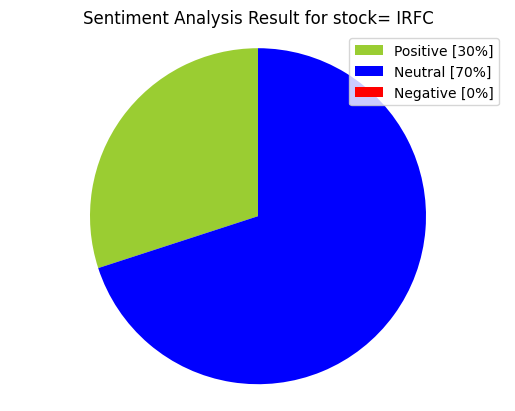

Wordcloud for IRFC


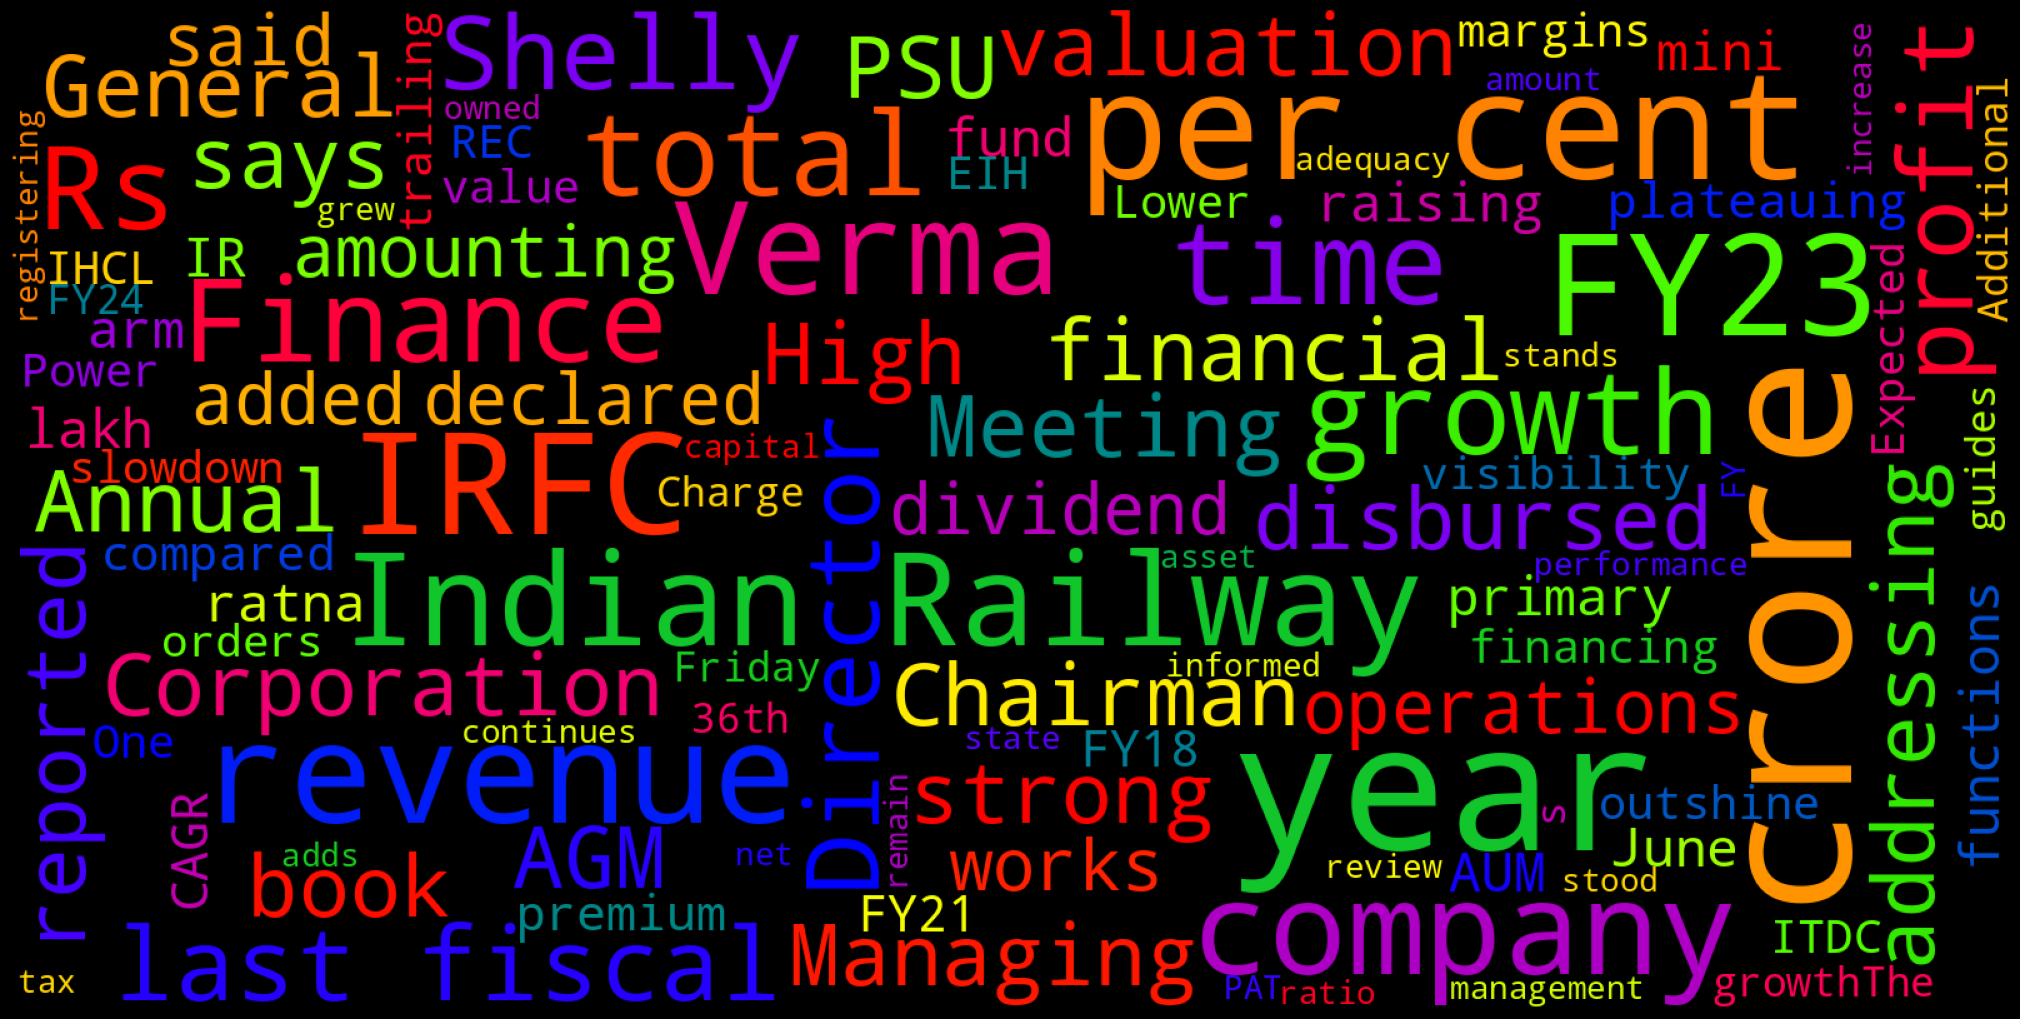

In [19]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Assigning Initial Values
positive = 0
negative = 0
neutral = 0
#Creating empty lists
news_list = []
neutral_list = []
negative_list = []
positive_list = []

#Iterating over the tweets in the dataframe
for news in news_df['Summary']:
    news_list.append(news)
    analyzer = SentimentIntensityAnalyzer().polarity_scores(news)
    neg = analyzer['neg']
    neu = analyzer['neu']
    pos = analyzer['pos']
    comp = analyzer['compound']

    if neg > pos:
        negative_list.append(news) #appending the news that satisfies this condition
        negative += 1 #increasing the count by 1
    elif pos > neg:
        positive_list.append(news) #appending the news that satisfies this condition
        positive += 1 #increasing the count by 1
    elif pos == neg:
        neutral_list.append(news) #appending the news that satisfies this condition
        neutral += 1 #increasing the count by 1

positive = percentage(positive, len(news_df)) #percentage is the function defined above
negative = percentage(negative, len(news_df))
neutral = percentage(neutral, len(news_df))

#Converting lists to pandas dataframe
news_list = pd.DataFrame(news_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
#using len(length) function for counting
print("Positive Sentiment:", '%.2f' % len(positive_list), end='\n')
print("Neutral Sentiment:", '%.2f' % len(neutral_list), end='\n')
print("Negative Sentiment:", '%.2f' % len(negative_list), end='\n')

#Creating PieCart
labels = ['Positive ['+str(round(positive))+'%]' , 'Neutral ['+str(round(neutral))+'%]','Negative ['+str(round(negative))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for stock= "+company_name+"" )
plt.axis('equal')
plt.show()

# Word cloud visualization
def word_cloud(text):
    stopwords = set(STOPWORDS)
    allWords = ' '.join([nws for nws in text])
    wordCloud = WordCloud(background_color='black',width = 1600, height = 800,stopwords = stopwords,min_font_size = 20,max_font_size=150,colormap='prism').generate(allWords)
    fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    ax.axis("off")
    fig.tight_layout(pad=0)
    plt.show()

print('Wordcloud for ' + company_name)
word_cloud(news_df['Summary'].values)
